Let us calculate the populations $p_i$ for the hyperfine magnetic states of the $5S_{1/2}$ ground state of rubidium in a thermal state. A thermal state has populations

$$p_i=\frac{ \exp{(-E_i/k_B T)} }{Z} \hspace{1cm} Z=\sum_j \exp{(-E_j/k_B T)} $$

where $E_i$ are the energies of each state and $k_B$ is Boltzman's constant.

In [1]:
from fast.atomic_structure import State, make_list_of_states
from sympy import Integer
from math import pi,exp,log

In [2]:
element="Rb"; iso=85
ground=State(element,iso,5,0,1/Integer(2))
ground

85Rb 5S_1/2

In [3]:
magnetic_states=make_list_of_states([ground],"magnetic")
magnetic_states

[85Rb 5S_1/2^2,-2,
 85Rb 5S_1/2^2,-1,
 85Rb 5S_1/2^2,0,
 85Rb 5S_1/2^2,1,
 85Rb 5S_1/2^2,2,
 85Rb 5S_1/2^3,-3,
 85Rb 5S_1/2^3,-2,
 85Rb 5S_1/2^3,-1,
 85Rb 5S_1/2^3,0,
 85Rb 5S_1/2^3,1,
 85Rb 5S_1/2^3,2,
 85Rb 5S_1/2^3,3]

In [4]:
e1=magnetic_states[0]

In [5]:
hbar=1.054571800e-34 #J*s
kB=1.38064852e-23 # J*K

In [6]:
E=[hbar*2*pi*e.nu for e in magnetic_states]
E

[-1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 -1.1733739171326158e-24,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25,
 8.38124226523297e-25]

In [7]:
T=20#Celsius degrees.
T=T+237.15 #Kelvin
T

257.15

In [8]:
Z=sum([exp(-E[i]/kB/T) for i in range(len(magnetic_states))])
Z

12.000000468134257

So the populations are:

In [9]:
p=[exp(-E[i]/kB/T)/Z for i in range(len(magnetic_states))]
p

[0.08336087600197295,
 0.08336087600197295,
 0.08336087600197295,
 0.08336087600197295,
 0.08336087600197295,
 0.08331365999859079,
 0.08331365999859079,
 0.08331365999859079,
 0.08331365999859079,
 0.08331365999859079,
 0.08331365999859079,
 0.08331365999859079]

Which is close to assigning populations equally:

In [10]:
p_deg=[1.0/len(magnetic_states) for i in range(len(magnetic_states))]
p_deg

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333]

Let's make a plot of the variation with temperature.

In [11]:
if iso==85:
    a=5
else:
    a=3

In [12]:
P1=sum(p[:a])
P2=sum(p[a:])
P1,P2

(0.41680438000986475, 0.5831956199901356)

In [13]:
def get_energies(element,iso):
    if element=="Rb":
        ground=State(element,iso,5,0,1/Integer(2))
    else:
        ground=State(element,iso,6,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
    E=[hbar*2*pi*e.nu for e in magnetic_states]
    return E

In [14]:
def pops(T,E,element,iso):
    if iso ==133:
        a=7
    elif iso ==85:
        a=5
    else:
        a=3

    if element=="Rb":
        ground=State(element,iso,5,0,1/Integer(2))
    else:
        ground=State(element,iso,6,0,1/Integer(2))
    magnetic_states=make_list_of_states([ground],"magnetic")
        
    Z=sum([exp(-E[i]/kB/T) for i in range(len(magnetic_states))])
    p=[exp(-E[i]/kB/T)/Z for i in range(len(magnetic_states))]
    return p[0],p[-1],sum(p[:a]),sum(p[a:])

In [15]:
from numpy import logspace,array
T=logspace(-2,3,201)

In [16]:
E85 =get_energies("Rb",85)
E87 =get_energies("Rb",87)
E133=get_energies("Cs",133)

In [17]:
dat=array([pops(Ti,E85,"Rb",85) for Ti in T])
p185=list(dat[:,0])
p285=list(dat[:,1])
P185=list(dat[:,2])
P285=list(dat[:,3])

In [18]:
dat=array([pops(Ti,E87,"Rb",87) for Ti in T])
p187=list(dat[:,0])
p287=list(dat[:,1])
P187=list(dat[:,2])
P287=list(dat[:,3])

In [19]:
dat=array([pops(Ti,E133,"Cs",133) for Ti in T])
p1133=list(dat[:,0])
p2133=list(dat[:,1])
P1133=list(dat[:,2])
P2133=list(dat[:,3])

In [20]:
show_mot_temperature=False
if show_mot_temperature:
    T_Doppler=145.537e-6
    T_lim=100e-6
    T=[T_lim]+list(T)
    T=array(T)

    p185=[1/5.0]+p185
    p285=[0.0  ]+p285
    P185=[1.0  ]+P185
    P285=[0.0  ]+P285

    p187=[1/3.0]+p187
    p287=[0.0  ]+p287
    P187=[1.0  ]+P187
    P287=[0.0  ]+P287

In [21]:
from matplotlib import pyplot
%matplotlib inline

(0, 1)

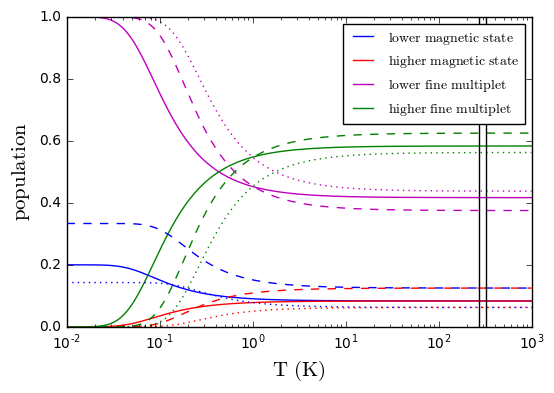

In [22]:
pyplot.close("all")
pyplot.semilogx(T,p185,"b",label=r"$\mathrm{lower \ magnetic \ state}$")
pyplot.semilogx(T,p285,"r",label=r"$\mathrm{higher \ magnetic \ state}$")
pyplot.semilogx(T,P185,"m",label=r"$\mathrm{lower \ fine \ multiplet}$")
pyplot.semilogx(T,P285,"g",label=r"$\mathrm{higher \ fine \ multiplet}$")

pyplot.semilogx(T,p187,"b--")
pyplot.semilogx(T,p287,"r--")
pyplot.semilogx(T,P187,"m--")
pyplot.semilogx(T,P287,"g--")

pyplot.semilogx(T,p1133,"b:")
pyplot.semilogx(T,p2133,"r:")
pyplot.semilogx(T,P1133,"m:")
pyplot.semilogx(T,P2133,"g:")


pyplot.semilogx([273.15,273.15],[0,1],"k")
pyplot.semilogx([273.15+50,273.15+50],[0,1],"k")
if show_mot_temperature: pyplot.semilogx([T_Doppler,T_Doppler],[0,1],"k")

pyplot.ylabel(r"$\mathrm{population}$",fontsize=15)
pyplot.xlabel(r"$\mathrm{T} \ \mathrm{(K)}$",fontsize=15)
pyplot.legend(fontsize=10)

pyplot.ylim([0,1])

Here solid lines show the populations for $^{85}\mathrm{Rb}$, dashed lines for $^{87}\mathrm{Rb}$, and dotted lines for $^{133}\mathrm{Cs}$. We can see that $^{85}\mathrm{Rb}$ is thermalized at slightly lower temperatures than $^{87}\mathrm{Rb}$: at about 5 and 10 Kelvin respectively all magnetic states reach the same population.

In [23]:
def entropy(p1,p2,iso):
    if iso==133:
        n1=7; n2=9
    elif iso==85:
        n1=5; n2=7
    elif iso==87:
        n1=3; n2=5
    return - kB*(n1*p1*log(p1) + n2*p2*log(p2))

In [24]:
S85 =[entropy(p185[i], p285[i], 85) for i in range(len(p185))]
S87 =[entropy(p187[i], p287[i], 87) for i in range(len(p187))]
S133=[entropy(p1133[i],p2133[i],133) for i in range(len(p187))]

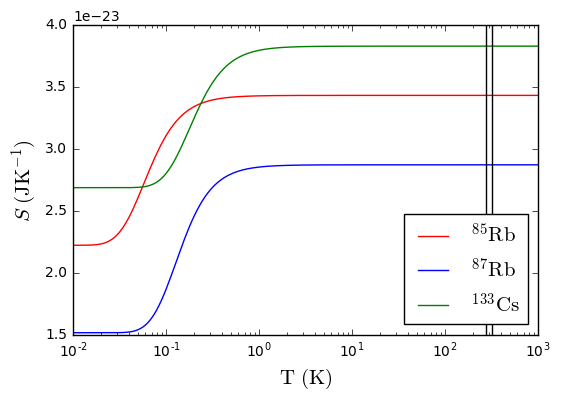

In [25]:
pyplot.close("all")
pyplot.semilogx(T,S85, "r",label=r"$^{85}  \mathrm{Rb}$")
pyplot.semilogx(T,S87, "b",label=r"$^{87}  \mathrm{Rb}$")
pyplot.semilogx(T,S133,"g",label=r"$^{133} \mathrm{Cs}$")

pyplot.semilogx([273.15,273.15]      ,[1.5e-23,4e-23],"k")
pyplot.semilogx([273.15+50,273.15+50],[1.5e-23,4e-23],"k")

pyplot.ylabel(r"$S \ \mathrm{(J K^{-1})}$",fontsize=15)
pyplot.xlabel(r"$\mathrm{T} \ \mathrm{(K)}$",fontsize=15)
pyplot.legend(fontsize=15,loc=4)